<a href="https://colab.research.google.com/github/gladcolor/tweet_translator/blob/master/Park_visitation_figure_Huan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Figure 1: Monthly trend



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from natsort import  natsorted
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as tkr
import numpy as np
import matplotlib.dates as dt
import matplotlib.ticker as ticker

## Prepare data

In [284]:
# monthly_csv_file = r'https://raw.githubusercontent.com/gladcolor/park_visitation/main/official_safegraph_visits.csv?token=AFLVEOBL5MNQO2BTVWZVRWLAZEXFK'
monthly_csv_file = r'https://raw.githubusercontent.com/gladcolor/tweet_translator/master/official_safegraph_visits.csv'
monthly_df = pd.read_csv(monthly_csv_file)
monthly_df.columns = ['Park', 'Month', 'Official 2019', 'Official 2020', 'Safegraph 2019', 'Safegraph 2020']
monthly_df

,Park,Month,Official 2019,Official 2020,Safegraph 2019,Safegraph 2020
0,Yosemite,Jan,116746,132742,6638,7807
1,Yosemite,Feb,111665,167778,5887,8611
2,Yosemite,Mar,173610,92324,9383,5017
3,Yosemite,Apr,297207,0,16186,2308
4,Yosemite,May,393004,0,18307,3571
...,...,...,...,...,...,...
67,Rocky Mountain,Aug,830039,580368,34850,34898
68,Rocky Mountain,Sep,752320,500019,27332,26553
69,Rocky Mountain,Oct,374003,297665,17000,17350
70,Rocky Mountain,Nov,123376,157875,10228,8816


In [7]:
sorted(mpl.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Draw figure

Do not konw how to show the ytick-labels besidew subplots in the left-most column.

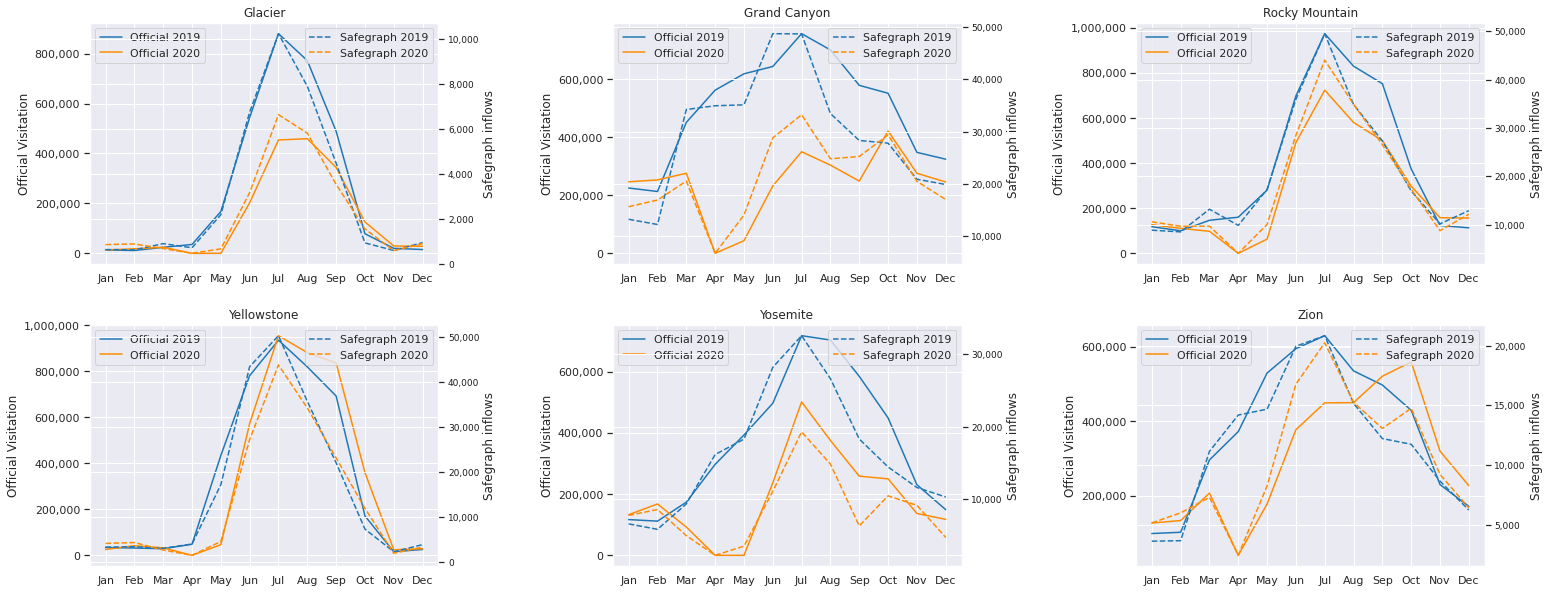

In [268]:
col_cnt = 3
row_cnt = 2
fig, axes = plt.subplots(nrows=row_cnt, ncols=col_cnt,  figsize=(25, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.25) # wspace for the space between left and right

park_names = list(monthly_df['Park'].unique())
park_names = natsorted(park_names)
park_names

month_label  = list(monthly_df.loc[:12, 'Month'])
# print(month_label)
# sns.set_theme(color_codes=True)

mpl.style.use('tableau-colorblind10')

for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass

def tick_formator(x, pos):
    s = f'{x:,.0f}'
    return s

for i in range(row_cnt):
    for j in range(col_cnt):
        park_idx = i * col_cnt + j
        park_name = park_names[park_idx]

        if row_cnt == 1:
            if col_cnt == 1:
                ax = axes
            else:
                ax = axes[j]
        else:
            ax = axes[i,j]
 
        ax.locator_params(axis='x', nbins=13)
        ax.locator_params(axis='y', nbins=6)
        
        # ax.axis("off")
        df = monthly_df[monthly_df['Park'] == park_name]
        df = df.set_index("Month")

        ax.plot(df['Official 2019'], color='tab:blue', label='Official 2019')
        ax.plot(df['Official 2020'], color='darkorange', label='Official 2020')
        
        ax.set_title(park_name)
        ax.set_ylabel("Official Visitation")
        ax.tick_params(labelbottom=True)
        [label.set_visible(True) for label in ax.get_xticklabels()]

        x_format = tkr.FuncFormatter(tick_formator)  # make formatter
        ax.yaxis.set_major_formatter(x_format)
        


        # ax.label_outer()
        ax.legend(loc="upper left")
         
        # ax2.set_xlabel(month_label)
        ax2 = ax.twinx()
        # ax2.label_outer()

        ax2.tick_params(axis='y', labelcolor='k')

        ax2.yaxis.set_major_formatter(x_format)


        ax2.locator_params(axis='y', nbins=6)

        ax2.tick_params(axis='both', which='both', labelsize=9, labelbottom=True)


        ax2.plot(df['Safegraph 2019'], linestyle='dashed', label='Safegraph 2019', color='tab:blue')
        ax2.plot(df['Safegraph 2020'], linestyle='dashed', label='Safegraph 2020', color='darkorange')

        ax2.set_ylabel("Safegraph inflows")
        # ax2.tick_params(axis='y', labelcolor='g')

        ax2.legend(loc="upper right")

        # [label.set_visible(True) for label in ax2.get_yticklabels()]


        # ax2.label_outer()  
        # set the visible property on ticklabels so xticklabels 
        # are visible only if the subplot is in the last row and yticklabels are visible only if the subplot is in the first column

        # ax2.set_yticklabels(list(range(10)))
        
        # plt.setp(ax.get_yticklabels(), visible=True)
        # plt.setp(ax2.get_yticklabels(), visible=True)

        # ax.tick_params(axis='x', labelrotation=90)

        if park_idx > len(park_names) -1:
            print("finished.")
            break
plt.show()

# Figure 2: Scatter plot

In [20]:
monthly_csv_file = r'https://raw.githubusercontent.com/gladcolor/tweet_translator/master/official_safegraph_visits.csv'
monthly_df = pd.read_csv(monthly_csv_file)
monthly_df

,Park,Month,Official 2019,Official 2020,Safegraph 2019,Safegraph 2020
0,Yosemite,Jan,116746,132742,6638,7807
1,Yosemite,Feb,111665,167778,5887,8611
2,Yosemite,Mar,173610,92324,9383,5017
3,Yosemite,Apr,297207,0,16186,2308
4,Yosemite,May,393004,0,18307,3571
...,...,...,...,...,...,...
67,Rocky Mountain,Aug,830039,580368,34850,34898
68,Rocky Mountain,Sep,752320,500019,27332,26553
69,Rocky Mountain,Oct,374003,297665,17000,17350
70,Rocky Mountain,Nov,123376,157875,10228,8816


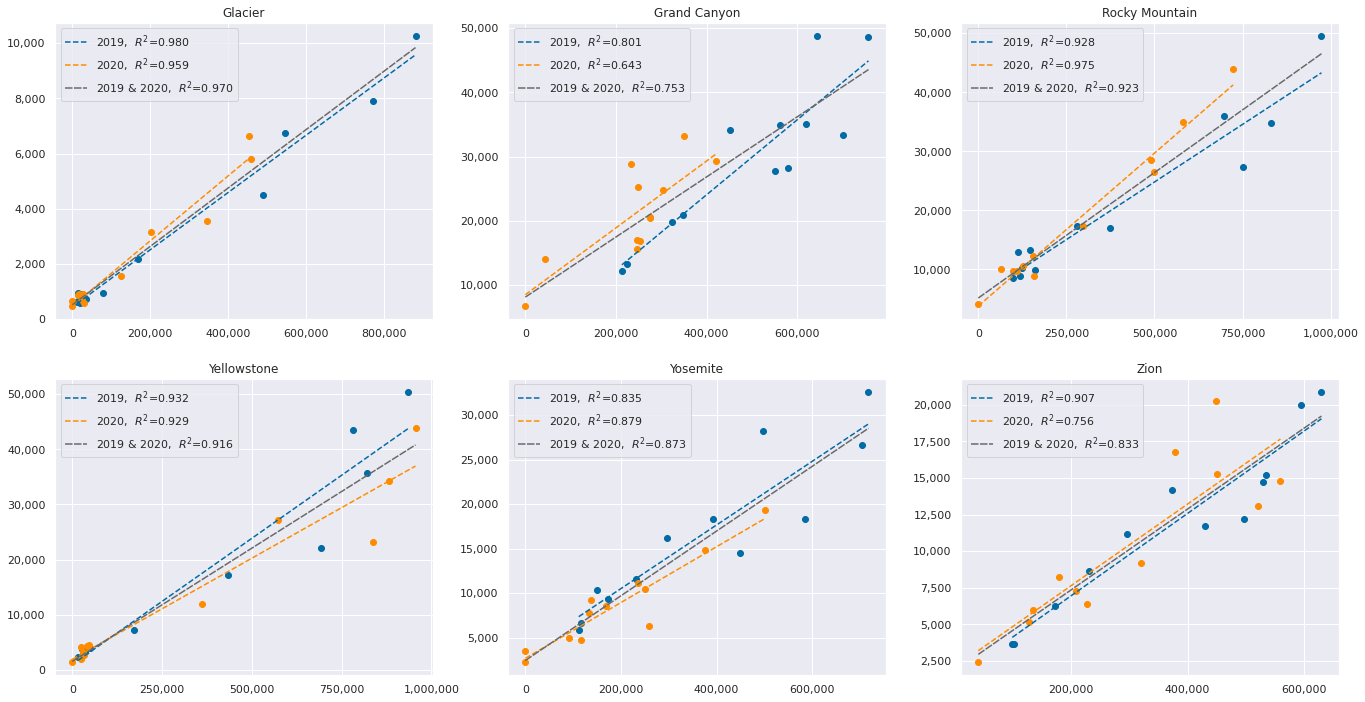

In [267]:
col_cnt = 3
row_cnt = 2
fig, axes = plt.subplots(nrows=row_cnt, ncols=col_cnt,  figsize=(23, 12))
# plt.subplots_adjust(wspace=0.4, hspace=0.4) #wspace for the space between left and right

park_names = list(monthly_df['Park'].unique())
park_names = natsorted(park_names)
park_names

month_label  = list(monthly_df.loc[:12, 'Month'])
# print(month_label)


linear_regressor = LinearRegression() 

def tick_formator(x, pos):
    s = f'{x:,.0f}'
    return s

for i in range(row_cnt):
    for j in range(col_cnt):
        park_idx = i * col_cnt + j
        park_name = park_names[park_idx]

        if row_cnt == 1:
            if col_cnt == 1:
                ax = axes
            else:
                ax = axes[j]
        else:
            ax = axes[i,j]
        
        df = monthly_df[monthly_df['Park'] == park_name]

        # plot 2019 data
        X = df['Official 2019']
        Y = df['Safegraph 2019']
        ax.scatter(X, Y)
         
        # regression:
        X = X.values.reshape(-1, 1)
        Y = Y.values.reshape(-1, 1)
        linear_regressor.fit(X, Y)
        Y_pred = linear_regressor.predict(X)
        min_idx = np.argmin(X)
        max_idx = np.argmax(X)
        ax.plot(X[[min_idx, max_idx]], Y_pred[[min_idx, max_idx]], linestyle="--")

        # save regression results
        r_squared =linear_regressor.score(X, Y)
        # r_squared = f'$R^2$={r_squared:.4f}'
        slope = linear_regressor.coef_[0][0]
        # slope = f'slope={slope:.4f}'
        intercept = linear_regressor.intercept_[0]
        # intercept = f'intercept={intercept:.0f}'
        lr_2019 = {"r_squared": r_squared,
            'slope': slope,
            'intercept': intercept}

        x_format = tkr.FuncFormatter(tick_formator)  # make formatter
        ax.xaxis.set_major_formatter(x_format)
        ax.yaxis.set_major_formatter(x_format)


        # plot 2020 data
        X = df['Official 2020']
        Y = df['Safegraph 2020']
        ax.scatter(X, Y,  color='darkorange')

        # regression:
        X = X.values.reshape(-1, 1)
        Y = Y.values.reshape(-1, 1)
        linear_regressor.fit(X, Y)
        Y_pred = linear_regressor.predict(X)
        min_idx = np.argmin(X)
        max_idx = np.argmax(X)
        ax.plot(X[[min_idx, max_idx]], Y_pred[[min_idx, max_idx]], color='darkorange', linestyle="--")

        ax.set_title(park_name)

        # ax.axis('scaled')

        r_squared =linear_regressor.score(X, Y)
        # r_squared = f'$R^2$={r_squared:.4f}'
        slope = linear_regressor.coef_[0][0]
        # slope = f'slope={slope:.4f}'
        intercept = linear_regressor.intercept_[0]
        # intercept = f'intercept={intercept:.0f}'

        lr_2020 = {"r_squared": r_squared,
                   'slope': slope,
                   'intercept': intercept}


        # plot 2019 + 2020 data
        X = df['Official 2020'].to_list() + df['Official 2019'].to_list()
        Y = df['Safegraph 2020'].to_list() +  df['Safegraph 2019'].to_list()

        # regression:
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        linear_regressor.fit(X, Y)
        Y_pred = linear_regressor.predict(X)
        min_idx = np.argmin(X)
        max_idx = np.argmax(X)
        ax.plot(X[[min_idx, max_idx]], Y_pred[[min_idx, max_idx]], color='dimgray', linestyle="--", dashes=(5, 1))

        r_squared =linear_regressor.score(X, Y)
        # r_squared = f'$R^2$={r_squared:.4f}'
        slope = linear_regressor.coef_[0][0]
        # slope = f'slope={slope:.4f}'
        intercept = linear_regressor.intercept_[0]
        # intercept = f'intercept={intercept:.0f}'

        lr_19_20 = {"r_squared": r_squared,
                   'slope': slope,
                   'intercept': intercept}

        lr_df = pd.DataFrame([lr_2019, lr_2020, lr_19_20])

        # ax.text(0.03, 0.7, slope, transform=ax.transAxes)
        # ax.text(0.03, 0.75, intercept, transform=ax.transAxes)
        # ax.text(0.03, 0.75, r_squared, transform=ax.transAxes)

        

        # print(f'{r_squared}')
        # print(f'{lr_2020["r_squared"]}')
        legeng_2019 = "2019,  " + f'$R^2$={lr_2019["r_squared"]:.3f}'
        legeng_2020 = "2020,  " + f'$R^2$={lr_2020["r_squared"]:.3f}'
        legeng_1920 = "2019 & 2020,  " + f'$R^2$={lr_19_20["r_squared"]:.3f}'
        ax.legend(loc="upper left", labels=[legeng_2019, legeng_2020, legeng_1920])

        ax.locator_params(axis='x', nbins=5)


        # draw table, not good 
        # ax.table(cellText=lr_df.values,
        #          colLabels=lr_df.columns,
        #          )
       
        if park_idx > len(park_names) -1:
            print("finished.")
            break


plt.show()

# Figure 3: Scatter plot (2 years together): not used, added to Figure 2

In [ ]:
monthly_csv_file = r'https://raw.githubusercontent.com/gladcolor/tweet_translator/master/official_safegraph_visits.csv'
monthly_df = pd.read_csv(monthly_csv_file)
monthly_df

,Park,Month,Official_2019,Official_2020,Safegraph_2019,Safegraph_2020
0,Yosemite,Jan,116746,132742,6638,7807
1,Yosemite,Feb,111665,167778,5887,8611
2,Yosemite,March,173610,92324,9383,5017
3,Yosemite,April,297207,0,16186,2308
4,Yosemite,May,393004,0,18307,3571
...,...,...,...,...,...,...
67,Rocky Mountain,August,830039,580368,34850,34898
68,Rocky Mountain,Sept,752320,500019,27332,26553
69,Rocky Mountain,Oct,374003,297665,17000,17350
70,Rocky Mountain,Nov,123376,157875,10228,8816


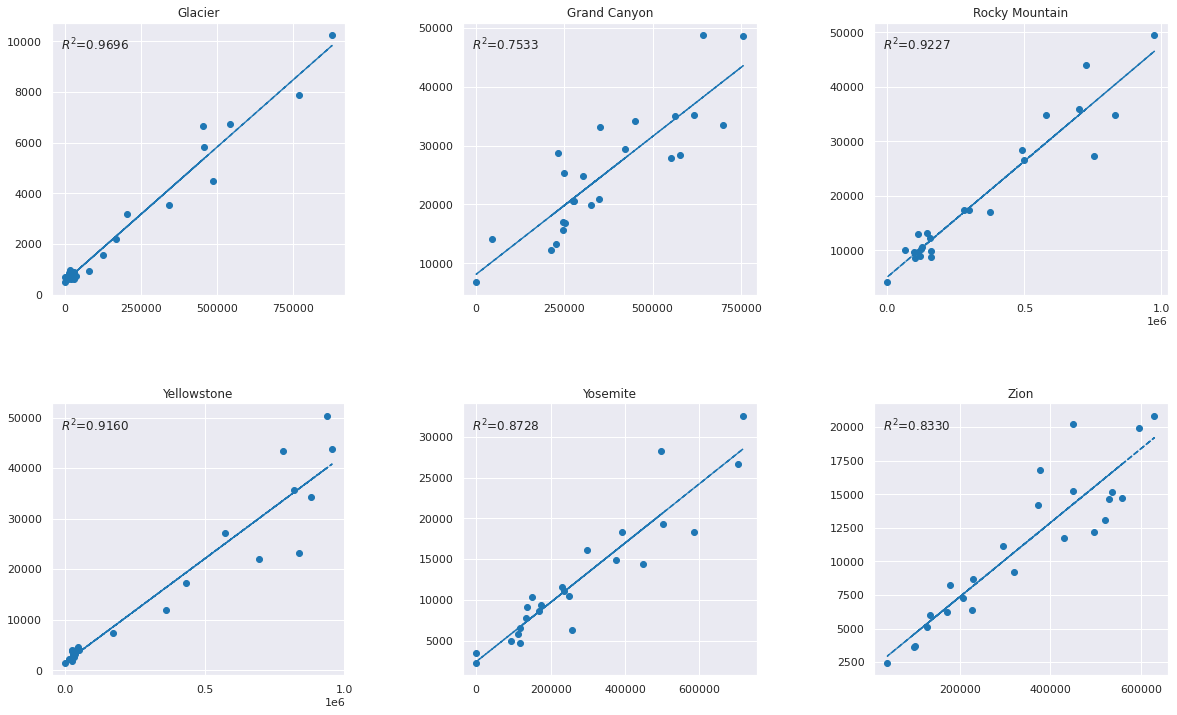

In [ ]:
col_cnt = 3
row_cnt = 2
fig, axes = plt.subplots(nrows=row_cnt, ncols=col_cnt,  figsize=(20, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #wspace for the space between left and right

park_names = list(monthly_df['Park'].unique())
park_names = natsorted(park_names)
park_names

month_label  = list(monthly_df.loc[:12, 'Month'])
# print(month_label)

for i in range(row_cnt):
    for j in range(col_cnt):
        park_idx = i * col_cnt + j
        park_name = park_names[park_idx]
        ax = axes[i,j]
        
        # ax.axis("off")
        df = monthly_df[monthly_df['Park'] == park_name]

        df = df.set_index("Month")

        X = df['Official 2020'].to_list() + df['Official 2019'].to_list()
        Y = df['Safegraph 2020'].to_list() +  df['Safegraph 2019'].to_list()

        ax.scatter(X, Y, color='tab:blue')

        # ax.scatter(df['Official_2019'], df['Safegraph_2019'], color='g')
        # ax.scatter(df['Official_2020'], df['Safegraph_2020'], color='g')

        ax.set_title(park_name)
        # ax.set_xlabel(month_label)

        # regression:
        linear_regressor = LinearRegression()  
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        linear_regressor.fit(X, Y)
        Y_pred = linear_regressor.predict(X)
        ax.plot(X, Y_pred, color='tab:blue', linestyle="dashed")


        r_squared =linear_regressor.score(X, Y)
        r_squared = f'$R^2$={r_squared:.4f}'
        slope = linear_regressor.coef_[0][0]
        slope = f'slope={slope:.4f}'
        intercept = linear_regressor.intercept_[0]
        intercept = f'intercept={intercept:.0f}'


        # ax.text(0.03, 0.85, slope, transform=ax.transAxes)
        # ax.text(0.03, 0.9, intercept, transform=ax.transAxes)
        ax.text(0.03, 0.9, r_squared, transform=ax.transAxes)
        
        ax.locator_params(axis='x', nbins=4)

        if park_idx > len(park_names) -1:
            print("finished.")
            break


plt.show()

# Figure 4: Daily visitation patterns 

## Prepare data

In [282]:
# monthly_csv_file = r'https://raw.githubusercontent.com/gladcolor/park_visitation/main/official_safegraph_visits.csv?token=AFLVEOBL5MNQO2BTVWZVRWLAZEXFK'
daily_csv_file = r'https://github.com/gladcolor/tweet_translator/raw/master/NP_groupby_20210607.zip'
daily_df = pd.read_csv(daily_csv_file)
daily_df = daily_df.replace({"GLAC": "Glacier", 
                  'GRCA': 'Grand Canyon',
                  'ROMO': 'Rocky Mountains',
                  'YELL': 'Yellowstone',
                  "YOSE": 'Yosemite',
                  'ZION': 'Zion'})
daily_df = daily_df[daily_df['flow_type'] == 'inflow']
daily_df

,park,flow_type,datestring,device_count,weekly_smooth
4386,Glacier,inflow,2019-01-01,37,37.000000
4387,Glacier,inflow,2019-01-02,30,33.500000
4388,Glacier,inflow,2019-01-03,23,30.000000
4389,Glacier,inflow,2019-01-04,30,30.000000
4390,Glacier,inflow,2019-01-05,18,27.600000
...,...,...,...,...,...
8767,Zion,inflow,2020-12-27,374,261.000000
8768,Zion,inflow,2020-12-28,353,278.285714
8769,Zion,inflow,2020-12-29,435,307.142857
8770,Zion,inflow,2020-12-30,409,338.571429


In [133]:
park_names = list(daily_df['park'].unique())
park_names = natsorted(park_names)
park_names

['Glacier',
 'Grand Canyon',
 'Rocky Mountains',
 'Yellowstone',
 'Yosemite',
 'Zion']

## Draw figure

park_names: ['Glacier', 'Grand Canyon', 'Rocky Mountains', 'Yellowstone', 'Yosemite', 'Zion']


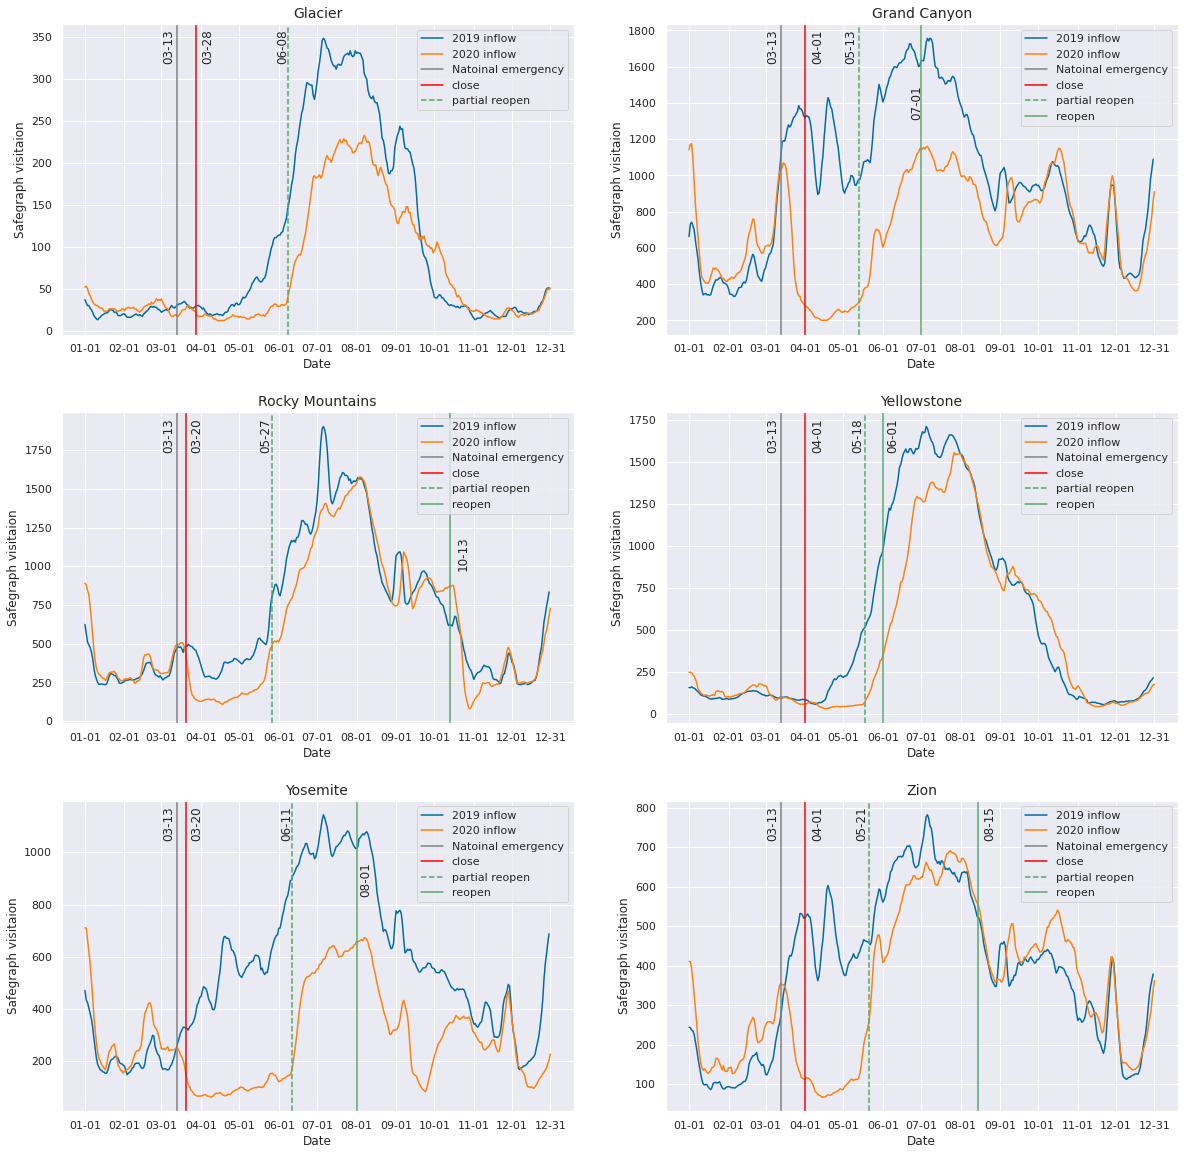

In [283]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

col_cnt = 2
row_cnt = 3
fig, axes = plt.subplots(nrows=row_cnt, ncols=col_cnt,  figsize=(20, 20))
plt.subplots_adjust(wspace=0.18, hspace=0.25) #wspace for the space between left and right

park_names = list(daily_df['park'].unique())
park_names = natsorted(park_names)
print("park_names:", park_names)

reopen_dates_file = r'https://raw.githubusercontent.com/gladcolor/tweet_translator/master/reopen_dates.csv'
reopen_dates_df = pd.read_csv(reopen_dates_file).set_index('Park')
# print("Reopen dates:\n", reopen_dates_df)


month_day_list = natsorted(list(daily_df['datestring'].str[-5:].unique()))

# print(month_day_list)


for i in range(row_cnt):

    for j in range(col_cnt):

        park_idx = i * col_cnt + j

        if park_idx > len(park_names) -1:
            print("finished.")
            break

        park_name = park_names[park_idx]
        ax = axes[i,j]
        
        df = daily_df[daily_df['park'] == park_name]

        df = df.sort_values('datestring')

        is_smooth = True

        if is_smooth:
            rolling_width = 7
            df['device_count'] = df['device_count'].rolling(rolling_width, min_periods=1).mean().astype(int) # smoothing        
        
        
        df.loc[:, 'date'] = pd.to_datetime(df['datestring'])
        df = df.set_index("date")

        df.loc[:, 'month_day'] = df.index.strftime("%m-%d")    
        
 
        ax.set_title(park_name, fontdict={"fontsize": 14})
        
        groupped = df.groupby([pd.Grouper(freq='A'), 'month_day'])['device_count'].sum().to_frame()

        # groupped = groupped.reorder_levels([0, 1])['device_count']

        # print(groupped.index)
        
        # ax.plot(groupped.loc['2020'].droplevel(0).index, groupped.loc['2020'], label='2020')
        # ax.legend()

        draw_df = groupped.loc['2019'].droplevel(0)       
        draw_df.plot(ax=ax)  

        draw_df = groupped.loc['2020'].droplevel(0)  
        draw_df.plot(ax=ax)

        ax.set_xlabel("Date")
        ax.set_ylabel("Safegraph visitaion")

        # draw first day of month
        
        months = [str(1 + i).zfill(2) + "-01" for i in range(12)] + ['12-31']
        months_idx = [month_day_list.index(i) for i in months]
        ax.set_xticks(months_idx)
        ax.set_xticklabels(months)
        # print(list(ax.get_xticklabels()))
        # ax.set_xticklabels(months)
        

        # ax.locator_params(axis='x', nbins=13)

        # draw vertical lines
        pandemic_date ='03-13'            
        pandemic_date_index = month_day_list.index(pandemic_date)
        ax.axvline(pandemic_date_index, color='grey')
        ax.text(x=pandemic_date_index / len(month_day_list), y=0.88, s='03-13', transform=ax.transAxes, rotation=90)

        try:
            close_date = reopen_dates_df.loc[park_name, 'Close']
            close_date = close_date[-5:]            
            close_day_index = month_day_list.index(close_date)
            ax.axvline(close_day_index, color='red', label="close day")
            ax.text(x=close_day_index / len(month_day_list) + 0.035, y=0.88, s=close_date, transform=ax.transAxes, rotation=90)

            partial_open_date = reopen_dates_df.loc[park_name, 'Partial reopen']
            partial_open_date = partial_open_date[-5:]
            partial_open_day_index = month_day_list.index(partial_open_date)
            ax.axvline(partial_open_day_index, color='g', linestyle='dashed')
            ax.text(x=partial_open_day_index / len(month_day_list) - 0.015, y=0.88, s=partial_open_date, transform=ax.transAxes, rotation=90)

            reopen_date = reopen_dates_df.loc[park_name, 'Reopen']
            reopen_date = reopen_date[-5:]            
            reopen_day_index = month_day_list.index(reopen_date)
            ax.axvline(reopen_day_index, color='g')
            y = 0.88
            x = reopen_day_index / len(month_day_list) + 0.015
            if park_name == "Rocky Mountains":
                y = 0.5
                x = reopen_day_index / len(month_day_list) - 0.01
            if park_name == "Grand Canyon":
                y = 0.7
                x = reopen_day_index / len(month_day_list) - 0.02
            if park_name in ['Yosemite']:
                y = 0.7
                x = reopen_day_index / len(month_day_list) - 0.00
            if park_name in ['Zion']:
                # y = 0.7
                x = reopen_day_index / len(month_day_list) - 0.00
            ax.text(x=x, y=y, s=reopen_date, transform=ax.transAxes, rotation=90)

        except:
            pass
        
        ax.legend(["2019 inflow", '2020 inflow', 'Natoinal emergency', 'close', 'partial reopen', 'reopen'])
        
        if park_idx > len(park_names) -1:
            print("finished.")
            break

# def find_date_index(month_day, date_list):
    
#     return 
def draw_date(ax, date_str, date_list, side='left', y=0.7):
    try:

        date_idx = date_list.index(date_str)
        x = date_idx / len(date_list)
        if side == "left":
            x = x
        if side == 'right':
            x = x + 0.04

        ax.text(x, y, date_str, transform=ax.transAxes, rotation=90)

    except:
        pass

plt.show()